In [1]:
import pandas as pd
from sklearn import * 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [21]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy()

del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


param_grid = {
    "est__l1_ratio": np.linspace(0, 0.05, 10),
    "est__alpha": 10 ** np.linspace(0, 2, 10)
}

pipe = pipeline.Pipeline([
#    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
#    ("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3, random_state=1)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

(<matplotlib.figure.Figure at 0x11c4feb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116912208>)

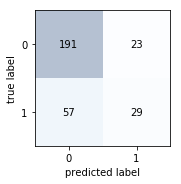

In [22]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [9]:
metrics.recall_score(y_test, y_test_pred)

0.3372093023255814

In [14]:
metrics.precision_score(y_test, y_test_pred)

0.5576923076923077

In [15]:
metrics.accuracy_score(y_test, y_test_pred)

0.7333333333333333

In [16]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

recall: 0.872093023255814 precision 0.4076086956521739


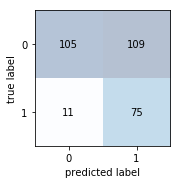

In [17]:
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred),
"precision", metrics.precision_score(y_test, y_test_pred))

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [19]:
pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})

,fpr,threshold,tpr
0,0.000000,1.800000,0.000000
1,0.009346,0.800000,0.011628
2,0.018692,0.750000,0.011628
3,0.107477,0.628099,0.337209
4,0.182243,0.390625,0.441860
5,0.509346,0.305677,0.872093
6,0.556075,0.255814,0.930233
7,1.000000,0.087719,1.000000


Text(0,0.5,'TPR')

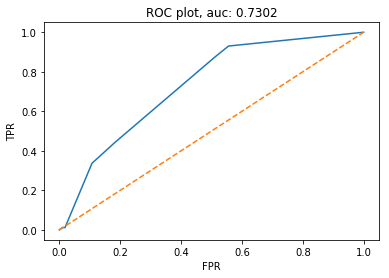

In [20]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC plot, auc: %.4f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [29]:
param_grid = {
    "est__max_depth": np.arange(2, 10)
}

pipe = pipeline.Pipeline([
    ("est", tree.DecisionTreeClassifier(random_state=1)) 
])

gsearch = model_selection.GridSearchCV(cv=5, verbose=True, scoring="accuracy",
                        estimator=pipe, n_jobs=1, param_grid=param_grid)
gsearch.fit(X_train, y_train)
est = gsearch.best_estimator_
print("Test accuracy:", metrics.accuracy_score(y_test, est.predict(X_test)), 
      "\nTrain accuracy", gsearch.best_score_,
      "\nparams:", gsearch.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Test accuracy: 0.72 
Train accuracy 0.6871428571428572 
params: {'est__max_depth': 2}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [35]:
tree_model = est.steps[-1][-1]
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png

In [39]:
pd.DataFrame({"feature": X.columns, 
    "importance": tree_model.feature_importances_}).sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.685667
0,months_loan_duration,0.236402
39,installment_plan_none,0.077931
36,property_other,0.000000
27,employment_length_1 - 4 yrs,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000
30,employment_length_unemployed,0.000000
31,personal_status_female,0.000000
32,personal_status_married male,0.000000


In [43]:
param_grid = {
    "est__max_depth": np.arange(2, 10)
}

pipe = pipeline.Pipeline([
    ("est", ensemble.RandomForestClassifier(random_state=1)) 
])

gsearch = model_selection.GridSearchCV(cv=5, verbose=True, scoring="accuracy",
                        estimator=pipe, n_jobs=1, param_grid=param_grid)
gsearch.fit(X_train, y_train)
est = gsearch.best_estimator_
print("Test accuracy:", metrics.accuracy_score(y_test, est.predict(X_test)), 
      "\nTrain accuracy", gsearch.best_score_,
      "\nparams:", gsearch.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Test accuracy: 0.7633333333333333 
Train accuracy 0.7457142857142857 
params: {'est__max_depth': 9}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


In [44]:
model = gsearch.best_estimator_.steps[-1][-1]
pd.DataFrame({"feature": X.columns, 
    "importance": model.feature_importances_})\
.sort_values("importance", ascending = False)

,feature,importance
1,amount,0.100966
9,checking_balance_unknown,0.100494
0,months_loan_duration,0.087507
4,age,0.081968
2,installment_rate,0.050873
7,checking_balance_< 0 DM,0.042825
3,residence_history,0.042215
35,other_debtors_none,0.025510
41,housing_own,0.025143
11,credit_history_fully repaid,0.024678
